#  NBA Player Salary Prediction 

## Steps 

       1.Data Wrangling andPreprocessing
       2.Descriptive Statistics and Data Visualization
       3.Feature Engineering
       4.Algorithims
       5.Hyper Parameter Tuning
    

## Required libraries

In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


## Functions
    1. Reading and Loading data
    2. Algorithim Evaluation
    3. Dropping values

In [2]:
def load_data():
    import pandas as pd
    import numpy as np
    P = pd.read_csv('data/players.csv')
    S =  pd.read_csv('data/salaries_1985to2018.csv')
    
#     print('Columns for player data = \n {}'.format(P.columns))
#     print('\n Columns for salary data = {}\n'.format(S.columns))
#     print(P.head(5))
#     print(S.head(5))
    

    # Droping some initial columns from data (iirelevant)
    players = P.drop(['birthPlace','college','draft_team','draft_year','highSchool','shoots','height','weight'],axis =1)
    salary = S.drop(['league','season_end','season','team'],axis =1)
    
    grouped_df = salary.groupby("player_id")
    maximums = grouped_df.max()
    df_salary = maximums.reset_index()
    
    # Removing all salaries before year 1985 (removing all players)
    df_salary['season_start'] = df_salary['season_start'].astype(int)
    df_salary = df_salary[df_salary['season_start'] > 1985]
    
    return players,df_salary

def evaluate_algo(name,model,param_model,X,y,dataframe,output =True):
    
#     X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)
    
    cv = ShuffleSplit(n_splits =5,test_size =0.2,random_state =0) 
    clr = GridSearchCV(model,param_grid = param_model,cv = cv,scoring = 'r2',return_train_score = False)
    clr.fit(X,y)

    print('Best Score Achieved = {}'.format(clr.best_score_))
    print('Best Parameters Achieved = {}'.format(clr.best_params_))


    # Prediction
    df = dataframe[['name','salary']] 
    clr_salary_pred = clr.predict(X)
    df['salary_prediction'] = clr_salary_pred

    #RMSE
    mse = mean_squared_error(df['salary'], clr_salary_pred)
    rmse = math.sqrt(mse)
    print('Root mean square error = {}'.format(rmse))
    
    
    if output == True:
        print(rmse)
        return df.sort_values(by = 'salary' ,ascending =False).head(20)

    return [name,clr.best_score_,clr.best_params_,rmse]




def drop_certain_value(df,column,value):
    df = df[(df[column] != value)]
    return df

## Merging dataframes - player_id
 1. We need to change number of positions (to only 5 types of positions - PG,SG,SF,PF,Center)
 2. I made make critical changes to important player positions

In [19]:
players ,salary = load_data()

# Merging dataframes on player id and dropping player id, and id afterwards
df = pd.merge(salary , players  ,how = 'inner' ,left_on ='player_id' ,right_on ='_id')


df.replace(to_replace =['Center and Power Forward','Center and Power Forward and Small Forward','Center and Power Forward and Small Forward','Center and Small Forward and Power Forward'],value ='Center',inplace =True)
df.replace(to_replace =['Point Guard','Point Guard and Power Forward and Small Forward and Shooting Guard','Point Guard and Shooting Guard','Point Guard and Shooting Guard and Small Forward','Point Guard and Small Forward','Point Guard and Small Forward and Shooting Guard'],value ='Point Guard',inplace =True)
df.replace(to_replace =['Power Forward','Power Forward and Center','Power Forward and Center and Small Forward','Power Forward and Shooting Guard','Power Forward and Shooting Guard and Small Forward','Power Forward and Small Forward','Power Forward and Small Forward and Center','Power Forward and Small Forward and Shooting Guard'],value ='Power Forward',inplace =True)   
df.replace(to_replace =['Shooting Guard','Shooting Guard and Point Guard','Shooting Guard and Point Guard and Small Forward','Shooting Guard and Power Forward and Point Guard','Shooting Guard and Power Forward and Small Forward','Shooting Guard and Small Forward','Shooting Guard and Small Forward and Point Guard','Shooting Guard and Small Forward and Power Forward'], value ='Shooting Guard',inplace =True)
df.replace(to_replace =['Small Forward','Small Forward and Center','Small Forward and Center and Power Forward','Small Forward and Point Guard and Shooting Guard','Small Forward and Power Forward','Small Forward and Power Forward and Center','Small Forward and Power Forward and Shooting Guard','Small Forward and Shooting Guard','Small Forward and Shooting Guard and Point Guard','Small Forward and Shooting Guard and Power Forward'], value ='Small Forward',inplace =True)

# Changing positions for the relevant superstars to get some accurate data

# Setting name to index and making critical changes to important player positions
df = df.set_index('name')

# POSITION CHANGES
df.loc['Tim Duncan','position']='Power Forward'
df.loc['Jason Kidd','position']='Point Guard'
df.loc['Giannis Antetokounmpo','position']='Small Forward'
df.loc['Dwyane Wade','position'] = 'Shooting Guard'
df.loc['Charles Barkley','position'] = 'Power Forward'
df.loc['Kevin Durant','position'] = 'Small Forward'
df.loc['Alonzo Mourning','position'] = 'Center'
df.loc['Paul Pierce','position'] = 'Small Forward'
df.loc['Tracy McGrady','position'] = 'Small Forward'
df.loc['Magic Johnson','position']='Point Guard'
df.loc['Patrick Ewing','position']='Center'
df.loc['Michael Jordan','position']='Shooting Guard'
df.loc['Kevin Garnett','position']='Power Forward'
df.loc['LeBron James','position']='Small Forward'
df.loc['Tristan Thompson','position']='Center'
df.loc['Draymond Green','position']='Power Forward'
df.loc['Derrick Favors','position']='Center'
df.loc['Marcus Morris','position']='Power Forward'
df.loc['Larry Nance Jr.','position']='Power Forward'
df.loc['John Henson','position']='Power Forward'
df.loc['Ed Davis','position']='Power Forward'
df= df.reset_index()


# Dropping the columns like(name,id etc)
df.drop(['player_id','_id'],axis =1,inplace =True)
# rearranging columns for clear view
df =df[['name','birthDate','season_start','career_FG%','career_FG3%','career_AST','career_TRB','career_FT%','career_PTS','career_PER','career_eFG%','career_WS','career_G','draft_pick','draft_round','position','salary']]
# Main DataFrame to work with
df.head()

,name,birthDate,season_start,career_FG%,career_FG3%,career_AST,career_TRB,career_FT%,career_PTS,career_PER,career_eFG%,career_WS,career_G,draft_pick,draft_round,position,salary
0,Alaa Abdelnaby,"June 24, 1968",1994,50.2,0.0,0.3,3.3,70.1,5.7,13.0,50.2,4.8,256,25th overall,1st round,Power Forward,805000
1,Kareem Abdul-Jabbar,"April 16, 1947",1988,55.9,5.6,3.6,11.2,72.1,24.6,24.6,55.9,273.4,1560,1st overall,1st round,Center,3000000
2,Mahmoud Abdul-Rauf,"March 9, 1969",2000,44.2,35.4,3.5,1.9,90.5,14.6,15.4,47.2,25.2,586,3rd overall,1st round,Point Guard,3300000
3,Tariq Abdul-Wahad,"November 3, 1974",2006,41.7,23.7,1.1,3.3,70.3,7.8,11.4,42.2,3.5,236,11th overall,1st round,Shooting Guard,6750000
4,Shareef Abdur-Rahim,"December 11, 1976",2009,47.2,29.7,2.5,7.5,81.0,18.1,19.0,47.9,71.2,830,3rd overall,1st round,Center,14625000


## Converting all the object datatypes to numerical data types for computation
    1. Dropping '-' found in dataframe
    2. Convertion to float
    3. Creating dummies for position
    

In [4]:
columns = ['career_FG%','career_FG3%','career_AST','career_TRB','career_FT%','career_PTS','career_PER','career_G','career_eFG%','career_WS']

for i in columns:
    df = drop_certain_value(df,i,'-')

convert_dict = {'career_FG%': float, 
                'career_FG3%':float,
                'career_FT%':float,
               'career_TRB':float,
               'career_PER':float,
               'career_eFG%':float,
                'career_WS':float} 
df2 = df.astype(convert_dict)
df2['salary'] = df2['salary'].apply(lambda x: x / 1000000)
df2.head()

C:\Users\AJAY_\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,name,birthDate,season_start,career_FG%,career_FG3%,career_AST,career_TRB,career_FT%,career_PTS,career_PER,career_eFG%,career_WS,career_G,draft_pick,draft_round,position,salary
0,Alaa Abdelnaby,"June 24, 1968",1994,50.2,0.0,0.3,3.3,70.1,5.7,13.0,50.2,4.8,256,25th overall,1st round,Power Forward,0.805
1,Kareem Abdul-Jabbar,"April 16, 1947",1988,55.9,5.6,3.6,11.2,72.1,24.6,24.6,55.9,273.4,1560,1st overall,1st round,Center,3.000
2,Mahmoud Abdul-Rauf,"March 9, 1969",2000,44.2,35.4,3.5,1.9,90.5,14.6,15.4,47.2,25.2,586,3rd overall,1st round,Point Guard,3.300
3,Tariq Abdul-Wahad,"November 3, 1974",2006,41.7,23.7,1.1,3.3,70.3,7.8,11.4,42.2,3.5,236,11th overall,1st round,Shooting Guard,6.750
4,Shareef Abdur-Rahim,"December 11, 1976",2009,47.2,29.7,2.5,7.5,81.0,18.1,19.0,47.9,71.2,830,3rd overall,1st round,Center,14.625


# Feature Engineering

In [5]:
df3 =df2.copy()
# DRAFT PICK -FIRST ROUND COMBINATION
import re
# Draft picks
values = {'draft_pick' : '0th draft'}
df3.fillna(value = values,inplace =True)

df3.draft_pick.unique()
df3['draft'] = df3['draft_pick'].apply(lambda x : int(re.findall(r"\d+",x)[0]))
df3 = df3.drop(['draft_pick'],axis =1)

# Adding jordan era -(before TV deals etc) - Players who played during his era
df3['jordan_era'] = df3['season_start'].apply(lambda x: 1 if x <= 2000 else 0)


# Calculating age
df3['birth_year'] = df3['birthDate'].apply(lambda x : x.split(',')[1]).astype(int)
df3['Age'] = df3['season_start'] - df3['birth_year']
df3.drop(['birth_year','birthDate','season_start','career_FG%','career_FG3%','career_FT%'],axis =1,inplace =True)

df4 = df3.copy()
# Requires Super star status  vs all star
# Considering draft and winshare to add a new column to special players who most likely got the big pay day
df4['draft_status'] = (df4['draft'] > 0) & (df4['draft'] <= 10) & (df4['career_WS'] > 85)
df4 ['draft_status']= df4['draft_status'].astype(int)
df4.head()

,name,career_AST,career_TRB,career_PTS,career_PER,career_eFG%,career_WS,career_G,draft_round,position,salary,draft,jordan_era,Age,draft_status
0,Alaa Abdelnaby,0.3,3.3,5.7,13.0,50.2,4.8,256,1st round,Power Forward,0.805,25,1,26,0
1,Kareem Abdul-Jabbar,3.6,11.2,24.6,24.6,55.9,273.4,1560,1st round,Center,3.000,1,1,41,1
2,Mahmoud Abdul-Rauf,3.5,1.9,14.6,15.4,47.2,25.2,586,1st round,Point Guard,3.300,3,1,31,0
3,Tariq Abdul-Wahad,1.1,3.3,7.8,11.4,42.2,3.5,236,1st round,Shooting Guard,6.750,11,0,32,0
4,Shareef Abdur-Rahim,2.5,7.5,18.1,19.0,47.9,71.2,830,1st round,Center,14.625,3,0,33,0


# Descriptive Statistics & Data Visualization

1. Check to see the correlation of each features w.r.t to salary
2. To see of something stands out

<IPython.core.display.Javascript object>


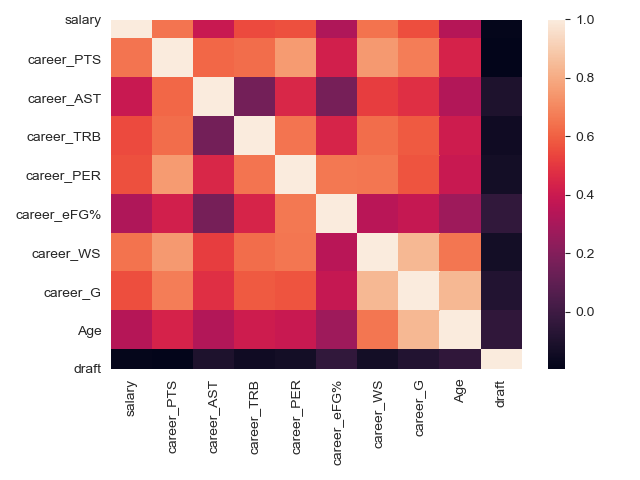

In [21]:
df5 = df4.copy()
plt.figure()
sns.set_style("white")
heat_salary= df5[['salary','career_PTS','career_AST','career_TRB','career_PER','career_eFG%','career_WS',
                           'career_G','Age','draft']]
dfData = heat_salary.corr() 
sns.heatmap(dfData)
plt.tight_layout()
plt.savefig('Images/heat_map.png')

<IPython.core.display.Javascript object>


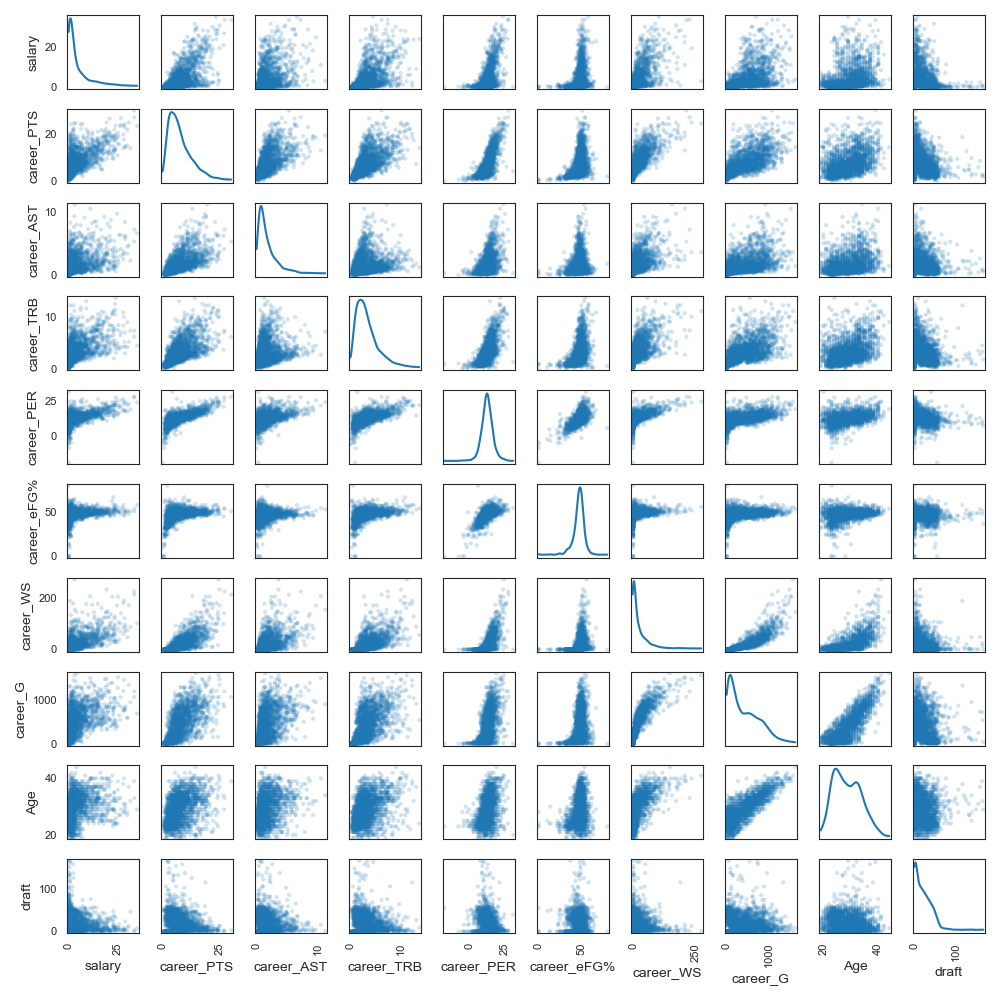

In [22]:
# Correlation
scatter_matrix(heat_salary, alpha=0.2, figsize=(10,10), diagonal='kde')
plt.tight_layout()
plt.savefig('Images/correlation.png')

In [8]:
df6 = df5.copy()
df7 = df6[['name','career_PTS','career_AST','career_TRB','career_eFG%','career_WS','career_G','career_PER','position','jordan_era','draft_status','salary']]
df7.rename(columns ={'career_WS' : 'win_share','salary_millions' :'salary'},inplace =True)


dummies = pd.get_dummies(df7['position'])
df8 = (pd.concat([df7,dummies],axis =1)).drop(['position'],axis =1)

# df8 =df7.copy()
# df8 =df8.drop(['position'],axis =1)
df8.head()

C:\Users\AJAY_\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,name,career_PTS,career_AST,career_TRB,career_eFG%,win_share,career_G,career_PER,jordan_era,draft_status,salary,Center,Point Guard,Power Forward,Shooting Guard,Small Forward
0,Alaa Abdelnaby,5.7,0.3,3.3,50.2,4.8,256,13.0,1,0,0.805,0,0,1,0,0
1,Kareem Abdul-Jabbar,24.6,3.6,11.2,55.9,273.4,1560,24.6,1,1,3.000,1,0,0,0,0
2,Mahmoud Abdul-Rauf,14.6,3.5,1.9,47.2,25.2,586,15.4,1,0,3.300,0,1,0,0,0
3,Tariq Abdul-Wahad,7.8,1.1,3.3,42.2,3.5,236,11.4,0,0,6.750,0,0,0,1,0
4,Shareef Abdur-Rahim,18.1,2.5,7.5,47.9,71.2,830,19.0,0,0,14.625,1,0,0,0,0


# ALGORITHIM

## Evaluation metrics :R2 Score, Best Parameter ,RMSE


    1. Linear Regression
    2  Polynomial Regression
    3. Lasso Regression
    4. Ridge Regression
    5. Decision Tree 
    6. Decision Forest
    
    
        

In [9]:
df9 = df8.copy()
X = df9.drop(['salary','name'],axis =1)
y = df9['salary']

## Regression Forest

In [10]:
# Regression Forest
param_rfr = {'max_depth' :range(1,9),
         'n_estimators':range(1,10),
        }
model_rfr = RandomForestRegressor()
value1 = evaluate_algo('Forest',model_rfr,param_rfr,X,y,df9,False)

Best Score Achieved = 0.7938451785819842
Best Parameters Achieved = {'max_depth': 7, 'n_estimators': 7}
Root mean square error = 1.9947239495407056


C:\Users\AJAY_\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Decision Tree

In [11]:
# Decision Tree
param_tree = {'max_depth' :range(1,9),
        'criterion' : ['mse','friedman_mse'],
        'splitter':['best','random']}

model_tree = DecisionTreeRegressor()
value2 =evaluate_algo('Tree',model_tree,param_tree,X,y,df9,False)

Best Score Achieved = 0.7490342302018069
Best Parameters Achieved = {'criterion': 'friedman_mse', 'max_depth': 6, 'splitter': 'best'}
Root mean square error = 2.3026879361292414


C:\Users\AJAY_\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Linear Regression

In [12]:
# Linear Regression

params_linear = {'normalize' : [True,False]}
Lr = LinearRegression()
value3 =evaluate_algo('Linear',Lr,params_linear,X,y,df9,False)

Best Score Achieved = 0.6059410688988338
Best Parameters Achieved = {'normalize': True}
Root mean square error = 3.494795969379467


C:\Users\AJAY_\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Lasso Regression

In [13]:
# Lasso Regression
params_lasso = {'alpha' :range(1,10) ,
         'selection':['random','cyclic']}
lasso = Lasso()
value4 =evaluate_algo('Lasso',lasso,params_lasso,X,y,df9,False)

Best Score Achieved = 0.49611226454347485
Best Parameters Achieved = {'alpha': 1, 'selection': 'random'}
Root mean square error = 4.000850642855247


C:\Users\AJAY_\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Polynomial Regression 

In [14]:
poly = PolynomialFeatures(degree = 2)
X_poly =poly.fit_transform(X)
params_poly = {'normalize' : [True,False]}
poly = LinearRegression()
value5 =evaluate_algo('Poly',poly,params_poly,X_poly,y,df9,False)

Best Score Achieved = 0.7553751041547807
Best Parameters Achieved = {'normalize': False}
Root mean square error = 2.5257674414168383


C:\Users\AJAY_\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## K Neighbors Regressor

In [15]:
params_knn ={'n_neighbors' : range(1,10)}
knn = KNeighborsRegressor()
value6 =evaluate_algo('Knn',knn,params_knn,X,y,df9,False)

Best Score Achieved = 0.5235648091145461
Best Parameters Achieved = {'n_neighbors': 6}
Root mean square error = 3.342856914037134


C:\Users\AJAY_\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Model Evaluation (Comparison)

In [16]:
main = zip(value1,value2,value3,value4,value5,value6)
Model_eval =pd.DataFrame(main,index =['Name','r2 Score','Parameters','RMSE']).T
Model_eval

,Name,r2 Score,Parameters,RMSE
0,Forest,0.793845,"{'max_depth': 7, 'n_estimators': 7}",1.99472
1,Tree,0.749034,"{'criterion': 'friedman_mse', 'max_depth': 6, ...",2.30269
2,Linear,0.605941,{'normalize': True},3.4948
3,Lasso,0.496112,"{'alpha': 1, 'selection': 'random'}",4.00085
4,Poly,0.755375,{'normalize': False},2.52577
5,Knn,0.523565,{'n_neighbors': 6},3.34286


## Feature Importance

<IPython.core.display.Javascript object>


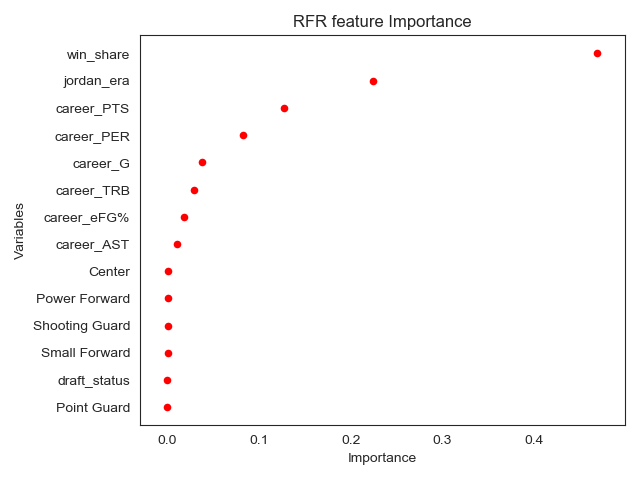

In [23]:
plt.figure()
cv = ShuffleSplit(n_splits =5,test_size =0.2,random_state =0) 
clr = GridSearchCV(model_rfr,param_grid = param_rfr,cv = cv,return_train_score = False).fit(X,y)
importances = clr.best_estimator_.feature_importances_
values = sorted(zip(X.columns, importances), key=lambda x: x[1] * -1)
imp = pd.DataFrame(values,columns = ["Name", "Score"])
imp.sort_values(by = 'Score',inplace = True)
sns.scatterplot(x='Score',y='Name',linewidth=0,data=imp,s = 30, color='red').set(xlabel='Importance', ylabel='Variables')
plt.title('RFR feature Importance')
plt.tight_layout()
plt.savefig('Images/RFR feature importance.png')

## Prediction

In [18]:
evaluate_algo('Forest',model_rfr,param_rfr,X,y,df9,True)

Best Score Achieved = 0.7893611299133897
Best Parameters Achieved = {'max_depth': 8, 'n_estimators': 9}
Root mean square error = 1.784280020503549
1.784280020503549


C:\Users\AJAY_\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,name,salary,salary_prediction
449,Stephen Curry,34.682550,31.799641
1009,LeBron James,33.285709,29.399772
1101,Michael Jordan,33.140000,28.021911
1399,Paul Millsap,31.269231,20.819057
285,Kobe Bryant,30.453805,28.637111
875,Gordon Hayward,29.727900,20.449984
793,Blake Griffin,29.727900,24.089005
1250,Kyle Lowry,28.703704,23.532421
399,Mike Conley,28.530608,17.585155
2173,Russell Westbrook,28.530608,27.606934
